In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./files/*.txt")
    return files
textfile=textfile()
textfile

['./files\\大同106news.txt', './files\\大同附註.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['大同股份有限公司','公允價值','財務報表','林蔚山']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Ken\AppData\Local\Temp\jieba.cache
Loading model cost 1.236 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stopwords = ['我', '對', '採用', '如下', '個體','10', '五年',  '相關','六年','部分','企業','之','於','註','係','民國','至','105.12','千元','資產','三十一日','期','負債','年','價值','按','7','12','有','年報','十二月','106.12','本集團','期間','計','所','集團','人','其','合','併','報導','等','已','時','100.00%','新','明','續','該','日','6','外','報告','股','財務','除','附','附錄','予','者','第','另','年度','本','○','臺','31','一','幣','後','大同','及','與','公司','單位','報表','公','司','為','月','有限公司','106','以','1','或','其他','金額','臺幣','1','2','3','4','5','000','認列','衡量','\n']
puncs = '！？｡/＂＃＄$％＆＇()（）( , )＊＋，_－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》.%「」『』【】 〔〕〖〗〘〙〚〛-〜,〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [5]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus = []
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    for w in r_list:
        if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
            r_list.remove(w)        
    st=" ".join(r_list)
    corpus.append(st)
corpus

['事件 內容 增資案 惹議 市場 派 提告 因現 金 增資 消息 曝光 股價 重挫 蒸發 億 市值 已經 損及 股東 權益 市場 派 股東 在 台北 地檢署 告發 再 重申 董事 會 決議 是 在 額定 股本 內 原 股東 的 現金 增資 從 未 涉入 股市 股價 是否 遭人為 操縱 無 從 得知 至於 日前 針對 股票 價格 波動 過度 劇烈 情事 依規定 自日 起 降低 融資 比率 一成 提高 融券 保證 金一成 市場 派 欣同 發聲明 指出 董事 會 通過 包括 每股 面額 元 辦理 現金 增資 億股 項 決議 表面 上 完成 增資 將可 改善 結構 強化 競爭力 但 億 股現 增案 雖 表示 發行 價格 暫時 未定 市場 消息 傳出 預定 將以 元 辦理 現增 由 市價 仍 元 導致 消息 一出 隔日 起 股價 連續 重挫 最低 點來 到 元 高院 判 林蔚山 需賠 億 最高院 發回 重審 投保 中心 控訴 董事 長 林蔚山 造成 損失 應予 賠償 台灣 高等法院 原判 決 林蔚山 共需 賠償 億元 但 最高 法院 廢棄 高院 的 原判 決 並發 回 重新 審理 最高法院 判決 理由 有項 尚志 資產給 通達 的 貸款 尚餘 萬未 清償 何以 持股 比例 計算 因此 所受 損害 萬 原審 並未 說明 理由 林蔚山 行為 無 造成 到 各 投資損 失達 億餘元 高院 未 調查 徒以 尚志 投資 以元 投資 通達 借貸 尚志 投資 尚志 投資 借貸 通達 的 款項 就認 定 損害 不無可議 高院 原 認定 尚志 投資 以元 投資 取得 通達 的 股份 不是 故 不 承受 該公 司損失 也 不是 受 損害 的 計算 基礎 若 果真如此 尚志 投資元 投資 通達 的 行為 是否 致 受 損害 尚非 無 疑 有關 增資 股款 溢價 發行 新股 股款 匯入 尚志 投資 原 審 逕 認 是 借 貸 違反 公司法 第條 第一 項規定 違背 的 忠 實及 注意 義務 不無認 作主 張事實 的 違法 通達 董事 會 決議 停業 如何 償 還銀行 款項 經與 銀行 溝通 及律 師建議 避免 影響 債信 由 原本 就是 連 保人 的 尚志 投資代償 原審 未加 審究 遽認 尚志 投資上 開行 是 林蔚山 指示 而 不利 的 判斷 並有 可議 高等法院 就 董事 長 因違 反證券 

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [6]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  5737


In [7]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (2, 5737)


<2x5737 sparse matrix of type '<class 'numpy.float64'>'
	with 5990 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [8]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)                

----Document 0----
上訴 0.07049072789185247 0 240
不會 0.07049072789185247 0 281
代表人 0.06604817233143041 0 781
候選人 0.09907225849714563 0 1005
假處 0.09907225849714563 0 1018
億元 0.08223918254049455 0 1092
全字 0.06604817233143041 0 1151
公司 0.12923300113506286 0 1174
判決 0.07049072789185247 0 1370
名單 0.06604817233143041 0 1810
地方法院 0.14098145578370494 0 2016
增資 0.07049072789185247 0 2076
大同 0.2584660022701257 0 2114
尚志 0.1057360918377787 0 2355
市場 0.09398763718913662 0 2461
投資 0.18797527437827324 0 2789
抗告 0.16512043082857605 0 2828
持股 0.05874227324321039 0 2854
提名 0.09907225849714563 0 2933
提起 0.1057360918377787 0 2944
損害 0.05874227324321039 0 2961
收到 0.08223918254049455 0 3020
最高法院 0.07049072789185247 0 3244
林宏信 0.06604817233143041 0 3398
林蔚山 0.14098145578370494 0 3401
欣同 0.14860838774571844 0 3527
法院 0.05874227324321039 0 3660
消息 0.06604817233143041 0 3685
獨立 0.09398763718913662 0 3871
相對 0.07049072789185247 0 4116
第號 0.05874227324321039 0 4275
緊急 0.08256021541428803 0 4408
股價 0.06604817233143

In [9]:
tfarray=tfidf.toarray()

In [10]:
tfarray

array([[0.        , 0.        , 0.        , ..., 0.        , 0.01651204,
        0.        ],
       [0.00111774, 0.00055887, 0.00055887, ..., 0.00055887, 0.        ,
        0.00111774]])

In [11]:
tfarray.shape

(2, 5737)

In [12]:
tfarray[0]

array([0.        , 0.        , 0.        , ..., 0.        , 0.01651204,
       0.        ])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [13]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_count'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_count,doc2_count
0,abs,0,2
1,absolute,0,1
2,absolutealpha,0,1
3,absolutealphalimited,0,1
4,absolutealphalimitedbritishvirginislands,0,1
5,advance,0,4
6,ahun,0,1
7,alpha,0,1
8,and,0,3
9,andtrading,0,2


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目

In [30]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_count,doc2_count
168,一一,0,3
169,一事,1,0
170,一二,0,1
171,一企業,0,4
172,一個,0,8
173,一個體,0,1
174,一元,0,7
175,一再,1,0
176,一出,1,0
177,一切正常,2,5


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [31]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 測試tfidf模型

In [32]:
test=['子公司','損益']
print(vectorizer.transform(test).toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### 全部文字的dict建立文字雲

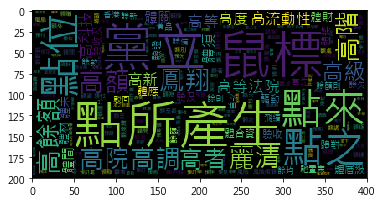

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

allcount=vec.vocabulary_

font = r"D:/NTUCSX/msjh.ttc"
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(allcount)
plt.imshow(wordcloud)

### doc1的dict建立文字雲

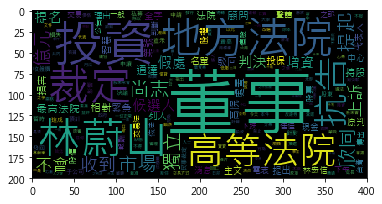

In [34]:
tfidf_dict1=dict(zip(df.words, df.doc1_count))
tfidf_dict1
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict1)
plt.imshow(wordcloud)


### doc2的dict建立文字雲

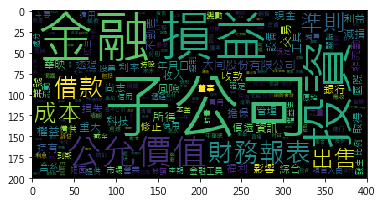

In [35]:
tfidf_dict2=dict(zip(df.words, df.doc2_count))
tfidf_dict2
wordcloud = WordCloud(font_path=font)
wordcloud.fit_words(tfidf_dict2)
plt.imshow(wordcloud)